# Introduction
The project our group members are currently focusing on can be generalized as the problem with regard to <b>"Intrusive Detection System(IDS)"</b>. IDS is one type of threat where people with an area of expertise in Networking are reluctant to meet. It can be categorized into three groups:
- Signature-Based IDS
- Anomaly-Based IDS
- Hybrid IDS


Signature-Based IDS refers to system where labels are already identified. As suggested by its name, a high performance efficiency is more likely to be obtained in executing labels that are not unknown, but those without designated patterns usually do not achieve an efficacious result compared to those known labels.

Anomaly-Based IDS, based the its special functionality and application, is another category that can resolve the drawback shown above that is troubled with many network programmers. For IDSs without labels, it plays an imperative role in that both the training errors and the testing errors during the process of training the model can be decreased significantly. However, while concentrating on those labels with specific signatures, its corresponding efficiency cannot be performed satisfactoraily. Therefore, a more comprehensive approach should be considered wisely so that both the training errors and the testing errors in terms of two types above can be optimized.

Finally, a hybrid approach by integrating Signature-Based IDS and Anomaly-Based altogether appears in that IDSs containing labels and non-labels can be tested rigorously.




# Purpose
According to the instructions illustrated above, the main purpose of this research is to simulate and evaluate the scenario of IDS in a dataset from Kaggle https://www.kaggle.com/datasets/aryashah2k/nfuqnidsv2-network-intrusion-detection-dataset with respect to three machine learning models: Decision Tree, Naive Bayes, and K-Nearest Neighbor.

In [173]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)

network = pd.read_csv('NF-UQ-NIDS-v2.csv', nrows=10000)
network.head(5)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,2,2,0,4293092,1875,0,64,64,140,140,0,140,140280.0,0.0,140,1,0,0,1120000,0,0,3,0,0,0,512,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,22,2,20,4294499,453,0,64,64,140,40,40,140,280.0,40.0,0,0,0,0,0,320000,1,2,0,0,0,512,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2


In [125]:
network['Dataset'].value_counts()

NF-BoT-IoT-v2            4934
NF-CSE-CIC-IDS2018-v2    2563
NF-ToN-IoT-v2            2203
NF-UNSW-NB15-v2           300
Name: Dataset, dtype: int64

In [92]:
network['SRC_TO_DST_SECOND_BYTES']

0       140280.0
1          280.0
2           44.0
3           44.0
4           44.0
          ...   
9995      2828.0
9996    140140.0
9997      2828.0
9998        58.0
9999        56.0
Name: SRC_TO_DST_SECOND_BYTES, Length: 10000, dtype: float64

In [93]:
network.dtypes

IPV4_SRC_ADDR                   object
L4_SRC_PORT                      int64
IPV4_DST_ADDR                   object
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
MAX_TTL                          int64
LONGEST_FLOW_PKT                 int64
SHORTEST_FLOW_PKT                int64
MIN_IP_PKT_LEN                   int64
MAX_IP_PKT_LEN                   int64
SRC_TO_DST_SECOND_BYTES        float64
DST_TO_SRC_SECOND_BYTES        float64
RETRANSMITTED_IN_BYTES           int64
RETRANSMITTED_IN_PKTS    

In [94]:
print("The dimension of the dataset extracted is: ", network.shape)
print("How many rows does this dataset contain: ", network.shape[0])
print("How many columns does this dataset contain: ", network.shape[1])


The dimension of the dataset extracted is:  (10000, 46)
How many rows does this dataset contain:  10000
How many columns does this dataset contain:  46


In [95]:
network.isnull().any()

IPV4_SRC_ADDR                  False
L4_SRC_PORT                    False
IPV4_DST_ADDR                  False
L4_DST_PORT                    False
PROTOCOL                       False
L7_PROTO                       False
IN_BYTES                       False
IN_PKTS                        False
OUT_BYTES                      False
OUT_PKTS                       False
TCP_FLAGS                      False
CLIENT_TCP_FLAGS               False
SERVER_TCP_FLAGS               False
FLOW_DURATION_MILLISECONDS     False
DURATION_IN                    False
DURATION_OUT                   False
MIN_TTL                        False
MAX_TTL                        False
LONGEST_FLOW_PKT               False
SHORTEST_FLOW_PKT              False
MIN_IP_PKT_LEN                 False
MAX_IP_PKT_LEN                 False
SRC_TO_DST_SECOND_BYTES        False
DST_TO_SRC_SECOND_BYTES        False
RETRANSMITTED_IN_BYTES         False
RETRANSMITTED_IN_PKTS          False
RETRANSMITTED_OUT_BYTES        False
R

In [96]:
print("What are the numbers and distributions of the various types of attacks in the dataset:\n", network['Attack'].value_counts())
print("\n")
print("\n")
print("How many sources does this dataset contain:\n", network['Dataset'].value_counts())

What are the numbers and distributions of the various types of attacks in the dataset:
 Benign            3324
DDoS              2862
DoS               2301
scanning           510
Reconnaissance     381
xss                311
password           138
injection           92
Bot                 26
Brute Force         23
Infilteration       22
Exploits             5
Fuzzers              4
Theft                1
Name: Attack, dtype: int64




How many sources does this dataset contain:
 NF-BoT-IoT-v2            4934
NF-CSE-CIC-IDS2018-v2    2563
NF-ToN-IoT-v2            2203
NF-UNSW-NB15-v2           300
Name: Dataset, dtype: int64


In [97]:
print(network.columns)

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'],
      dtype='ob

In [98]:
mapping = {'Benign': 'Benign', 'DoS': 'DoS/DDos', 'DDoS': 'DoS/DDos', 'scanning': 'Phishing', 'Reconnaissance':'Phishing', 
           'xss': 'XSS', 'password': 'Password', 'injection': 'SQL Injection', 'Bot': 'Botnet', 'Brute Force': 'Brute Force',
           'Infilteration': 'Phishing', 'Exploits': 'Zero Day Exploit', 'Fuzzers': 'Phishing', 'Backdoor': 'Malware',
           'Generic': 'Malware', 'mitm': 'MITM', 'ransomware': 'Malware', 'Analysis': 'Phishing', 
           'Theft': 'Phishing', 'Shellcode': 'Zero Day Exploit', 'Worms': 'Malware'}
network['Attack_Class'] = network['Attack'].apply(lambda v: mapping[v])
network = network.drop('Attack', axis = 1)
network.head(5)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Dataset,Attack_Class
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,2,2,0,4293092,1875,0,64,64,140,140,0,140,140280.0,0.0,140,1,0,0,1120000,0,0,3,0,0,0,512,0,35840,140,0,0,0,0.0,1,NF-BoT-IoT-v2,DoS/DDos
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,22,2,20,4294499,453,0,64,64,140,40,40,140,280.0,40.0,0,0,0,0,0,320000,1,2,0,0,0,512,0,0,0,0,0,0,0.0,1,NF-BoT-IoT-v2,DoS/DDos
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,NF-ToN-IoT-v2,Benign
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,NF-ToN-IoT-v2,Benign
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,NF-ToN-IoT-v2,Benign


In [99]:
network['Attack_Class'].value_counts()

DoS/DDos            5163
Benign              3324
Phishing             918
XSS                  311
Password             138
SQL Injection         92
Botnet                26
Brute Force           23
Zero Day Exploit       5
Name: Attack_Class, dtype: int64

In [100]:
network['DST_TO_SRC_SECOND_BYTES']

0         0.0
1        40.0
2        40.0
3        40.0
4        40.0
        ...  
9995      0.0
9996      0.0
9997      0.0
9998    152.0
9999      0.0
Name: DST_TO_SRC_SECOND_BYTES, Length: 10000, dtype: float64

In [101]:
network.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,40740.956600,3378.488100,10.290600,52.587147,704.059200,7.965300,2.545798e+03,4.11230,25.070500,23.042200,9.570800,2.316178e+06,525.505600,16.743900,53.785000,53.827800,265.820800,62.416200,23.971800,265.820800,5.499315e+11,5.695097e+11,66.172200,0.356700,807.390500,0.724900,2.764762e+06,7.429096e+06,18.662000,0.910500,0.308000,0.266300,1.578000,6218.543100,8615.838400,3590.759100,14.026400,4594.654600,1.384500,970.499500,1.37330,0.667600
std,18262.031038,10794.977262,6.340644,78.697750,9574.402312,165.805078,4.075491e+04,31.07986,59.740516,59.859121,17.864414,2.140426e+06,653.981972,117.147158,39.757865,39.783369,423.448884,43.951195,27.181944,423.448884,5.496124e+13,5.691225e+13,1162.994533,2.135725,19065.037095,13.388112,1.881293e+07,8.063983e+07,968.806481,2.740737,1.382001,3.512124,26.731558,13585.545628,17881.014948,11249.502339,43.943368,13413.387741,10.453477,22628.828195,17.24695,0.471097
min,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,28.000000,0.000000,28.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27954.750000,80.000000,6.000000,0.000000,56.000000,1.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,40.000000,40.000000,0.000000,40.000000,6.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.240000e+05,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,46070.000000,80.000000,6.000000,7.000000,112.000000,2.000000,0.000000e+00,0.00000,2.000000,2.000000,0.000000,4.293060e+06,16.000000,0.000000,64.000000,64.000000,101.500000,44.000000,0.000000,101.500000,1.257000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.200000e+05,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,55293.000000,443.000000,17.000000,91.220000,320.000000,3.000000,1.560000e+02,2.00000,22.000000,6.000000,20.000000,4.294029e+06,1047.000000,0.000000,64.000000,64.000000,140.000000,69.000000,40.000000,140.000000,3.530750e+03,1.670000e+02,0.000000,0.000000,0.000000,0.000000,1.120000e+06,9.120000e+05,4.000000,2.000000,0.000000,0.000000,0.000000,4096.000000,229.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,65535.000000,65476.000000,253.000000,244.000000,561982.000000,12217.000000,1.641360e+06,1278.00000,223.000000,223.000000,218.000000,4.294966e+06,2516.0

In [102]:
attack_class_division = network[['Attack_Class']].apply(lambda t: t.value_counts())
attack_class_division['Frequency'] = np.round((attack_class_division / attack_class_division.sum()) * 100, 2)
attack_table = pd.concat([attack_class_division], axis=1)
attack_table

,Attack_Class,Frequency
DoS/DDos,5163,51.63
Benign,3324,33.24
Phishing,918,9.18
XSS,311,3.11
Password,138,1.38
SQL Injection,92,0.92
Botnet,26,0.26
Brute Force,23,0.23
Zero Day Exploit,5,0.05


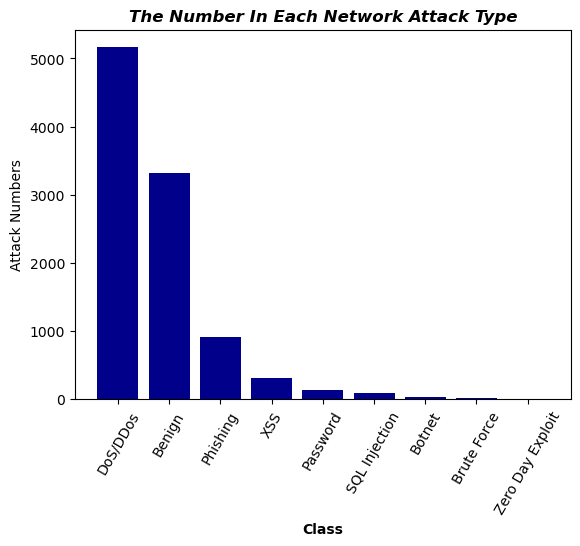

<Figure size 100000x12000 with 0 Axes>

In [103]:
plt.bar(attack_table.index, attack_table['Attack_Class'], color='darkblue')
plt.xlabel("Class", fontweight="bold")
plt.ylabel("Attack Numbers")
plt.title("The Number In Each Network Attack Type", fontfamily='DejaVu Sans', 
          fontweight="bold", fontstyle="italic")
plt.xticks(rotation=60, fontsize=10)
plt.figure(figsize=(1000, 120))
plt.show()

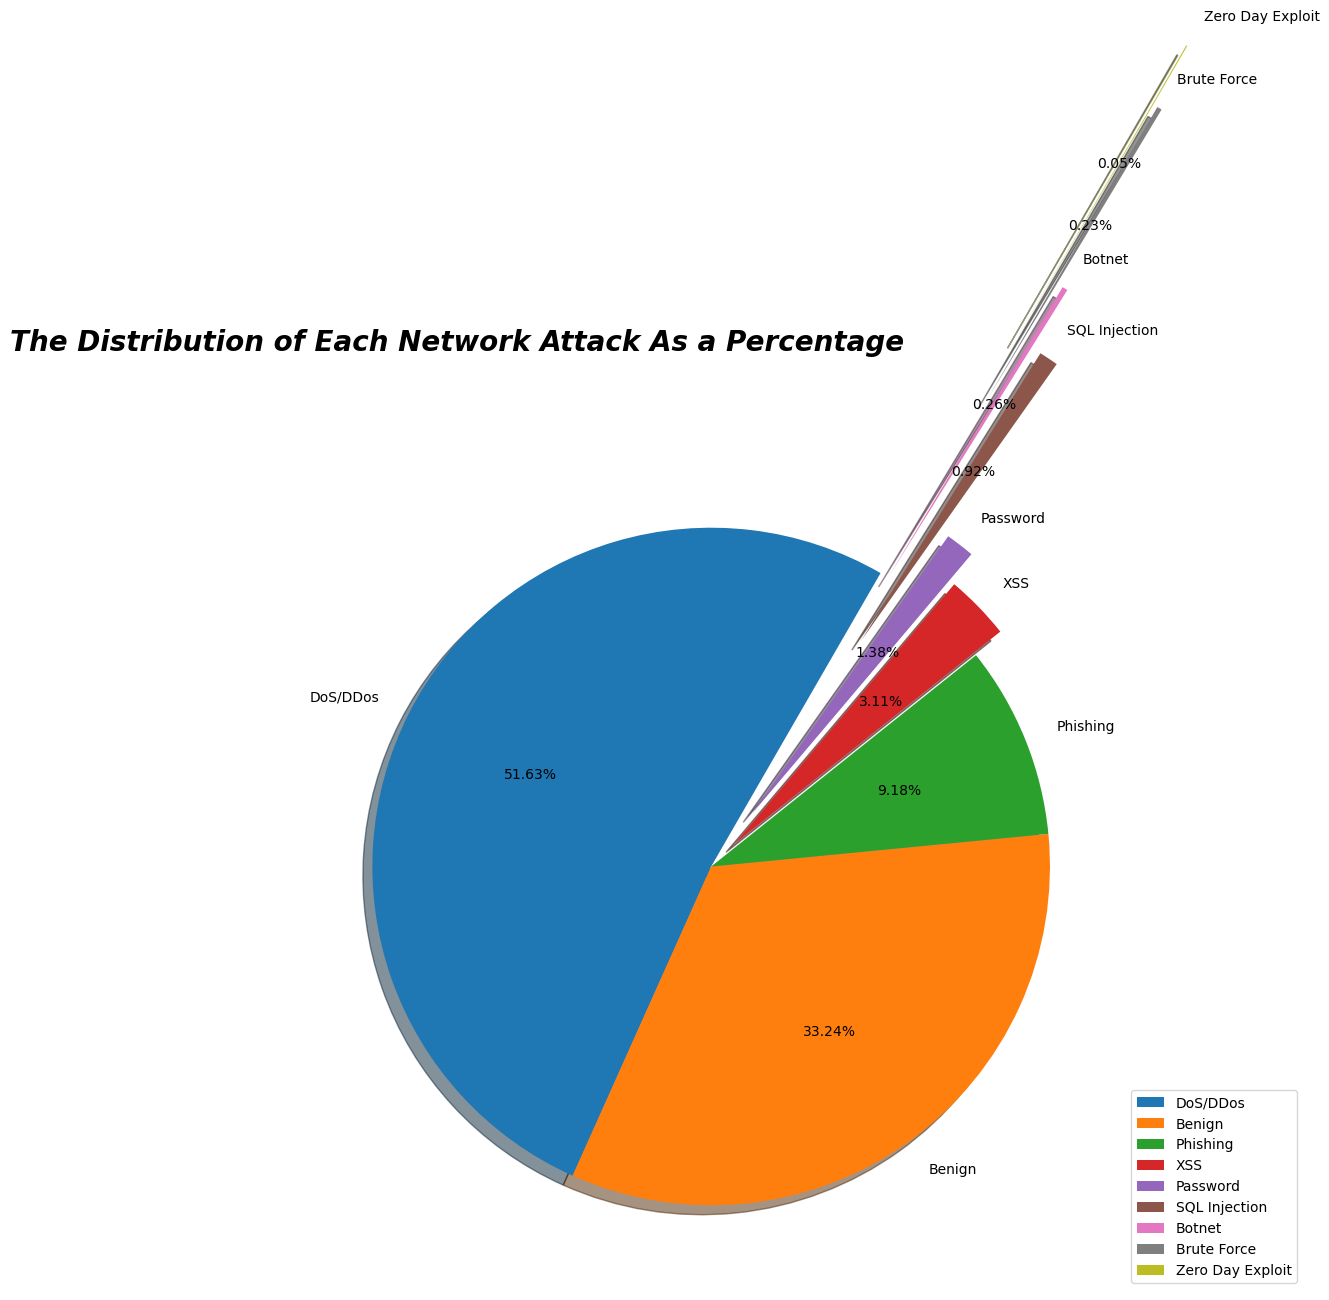

In [104]:
plt.figure(figsize=(11, 11))
explode=(0, 0, 0, 0.1, 0.2, 0.8, 1.0, 1.6, 1.8)
plt.pie(attack_table['Frequency'], labels=attack_table.index,
        autopct="%1.2f%%", explode=explode, shadow=True, radius = 1, startangle=60)
plt.title("The Distribution of Each Network Attack As a Percentage", fontsize = 20, 
          fontweight="bold", fontstyle="italic", fontfamily="DejaVu Sans",  
          x = 0.2, y = 1.1)
plt.legend(loc= 'lower right', bbox_to_anchor=(0, 0, 1.2, 0.1))
plt.show() 


In [105]:
network['SRC_TO_DST_SECOND_BYTES'].isnull().any()

False

In [106]:
network

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Dataset,Attack_Class
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,2,2,0,4293092,1875,0,64,64,140,140,0,140,140280.0,0.0,140,1,0,0,1120000,0,0,3,0,0,0,512,0,35840,140,0,0,0,0.0,1,NF-BoT-IoT-v2,DoS/DDos
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,22,2,20,4294499,453,0,64,64,140,40,40,140,280.0,40.0,0,0,0,0,0,320000,1,2,0,0,0,512,0,0,0,0,0,0,0.0,1,NF-BoT-IoT-v2,DoS/DDos
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,NF-ToN-IoT-v2,Benign
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,NF-ToN-IoT-v2,Benign
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,22,2,20,0,0,0,0,0,44,40,40,44,44.0,40.0,0,0,0,0,352000,320000,2,0,0,0,0,1024,0,0,0,0,0,0,0.0,0,NF-ToN-IoT-v2,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,192.168.100.150,60203,192.168.100.3,80,17,188.0,56,2,0,0,0,0,0,4293825,1142,0,64,64,28,28,0,28,2828.0,0.0,0,0,0,0,224000,0,2,0,0,0,0,0,0,0,0,0,0,0,0.0,1,NF-BoT-IoT-v2,DoS/DDos
9996,192.168.100.147,5522,192.168.100.5,80,6,7.0,280,2,0,0,2,2,0,4294029,938,0,64,64,140,140,0,140,140140.0,0.0,0,0,0,0,1120000,0,0,2,0,0,0,512,0,0,0,0,0,0,0.0,1,NF-BoT-IoT-v2,DoS/DDos
9997,192.168.100.147,5753,192.168.100.3,80,17,188.0,56,2,0,0,0,0,0,4294154,813,0,64,64,28,28,0,28,2828.0,0.0,0,0,0,0,224000,0,2,0,0,0,0,0,0,0,0,0,0,0,0.0,1,NF-BoT-IoT-v2,DoS/DDos
9998,172.31.67.119,54723,172.31.0.2,53,17,0.0,58,1,152,1,0,0,0,0,0,0,0,0,152,58,58,152,58.0,152.0,0,0,0,0,464000,1216000,1,1,0,0,0,0,0,0,0,15717,1,13,0.0,0,NF-CSE-CIC-IDS2018-v2,Benign


In [138]:
network['Dataset'].value_counts()

NF-BoT-IoT-v2            4934
NF-CSE-CIC-IDS2018-v2    2563
NF-ToN-IoT-v2            2203
NF-UNSW-NB15-v2           300
Name: Dataset, dtype: int64

In [108]:
# In this specific example, the dataset in each group can be identified with respect to each number:
# 0: NF-BOT-IOT-v2
# 1: NF-CSE-CIC-IDS2-18-v2
# 2: NF-ToN-IoT-v2
# 3: NF-UNSW-NB15-v2

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
scaler_columns_names = network.select_dtypes(include=['float64', 'int64']).columns
scaler_columns_satisfied = scaler.fit_transform(network.select_dtypes(include=['float64', 'int64']))
numeric_model = pd.DataFrame(scaler_columns_satisfied, columns=scaler_columns_names)

encoder = LabelEncoder()
encoder_column_names = network.select_dtypes(include=['object']).copy()
encoder_columns_satisfied = encoder_column_names.apply(encoder.fit_transform)
encoder_columns_satisfied_without_labels = encoder_columns_satisfied.drop(['Attack_Class'], axis=1)
labels_referenced = network[['Attack_Class']].copy()

train_X = pd.concat([numeric_model, encoder_columns_satisfied_without_labels], axis=1)
train_y = labels_referenced
train_X

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,IPV4_SRC_ADDR,IPV4_DST_ADDR,Dataset
0,1.349755,-0.305573,-0.676716,-0.579298,-0.029670,-0.029948,-0.062469,-0.132321,-0.386198,-0.351546,-0.535773,0.923654,2.063607,-0.142938,0.256943,0.255703,-0.297148,1.765314,-0.881946,-0.297148,-0.010006,-0.010007,0.063484,0.301224,-0.042351,-0.054148,-0.087432,-0.092131,-0.019264,0.762424,-0.222876,-0.075827,-0.059034,-0.420066,-0.481867,2.866869,2.866869,-0.342560,-0.132451,-0.042890,-0.07963,0.705622,632,502,0
1,-1.620216,-0.305573,-0.676716,-0.579298,-0.044293,-0.035980,-0.061488,-0.100144,-0.051400,-0.351546,0.583827,0.924311,-0.110873,-0.142938,0.256943,0.255703,-0.297148,-0.510050,0.589693,-0.297148,-0.010006,-0.010007,-0.056901,-0.167024,-0.042351,-0.054148,-0.146968,-0.088163,-0.018232,0.397541,-0.222876,-0.075827,-0.059034,-0.420066,-0.481867,-0.319209,-0.319209,-0.342560,-0.132451,-0.042890,-0.07963,0.705622,632,500,0
2,0.072342,-0.216546,-0.676716,-0.668250,-0.068943,-0.042011,-0.061488,-0.100144,-0.051400,-0.351546,0.583827,-1.082165,-0.803588,-0.142938,-1.352882,-1.353090,-0.523869,-0.510050,0.589693,-0.523869,-0.010006,-0.010007,-0.056901,-0.167024,-0.042351,-0.054148,-0.128257,-0.088163,-0.017199,-0.332226,-0.222876,-0.075827,-0.059034,-0.382377,-0.481867,-0.319209,-0.319209,-0.342560,-0.132451,-0.042890,-0.07963,-1.417189,622,494,2
3,0.334484,0.530969,-0.676716,-0.668250,-0.068943,-0.042011,-0.061488,-0.100144,-0.051400,-0.351546,0.583827,-1.082165,-0.803588,-0.142938,-1.352882,-1.353090,-0.523869,-0.510050,0.589693,-0.523869,-0.010006,-0.010007,-0.056901,-0.167024,-0.042351,-0.054148,-0.128257,-0.088163,-0.017199,-0.332226,-0.222876,-0.075827,-0.059034,-0.382377,-0.481867,-0.319209,-0.319209,-0.342560,-0.132451,-0.042890,-0.07963,-1.417189,625,494,2
4,0.526750,-0.212562,-0.676716,-0.668250,-0.068943,-0.042011,-0.061488,-0.100144,-0.051400,-0.351546,0.583827,-1.082165,-0.803588,-0.142938,-1.352882,-1.353090,-0.523869,-0.510050,0.589693,-0.523869,-0.010006,-0.010007,-0.056901,-0.167024,-0.042351,-0.054148,-0.128257,-0.088163,-0.017199,-0.332226,-0.222876,-0.075827,-0.059034,-0.382377,-0.481867,-0.319209,-0.319209,-0.342560,-0.132451,-0.042890,-0.07963,-1.417189,621,474,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.065764,-0.305573,1.058210,1.720756,-0.067690,-0.035980,-0.062469,-0.132321,-0.419678,-0.384960,-0.535773,0.923997,0.942725,-0.142938,0.256943,0.255703,-0.561656,-0.783094,-0.881946,-0.561656,-0.010006,-0.010007,-0.056901,-0.167024,-0.042351,-0.054148,-0.135061,-0.092131,-0.017199,-0.332226,-0.222876,-0.075827,-0.059034,-0.457755,-0.481867,-0.319209,-0.319209,-0.342560,-0.132451,-0.042890,-0.07963,0.705622,634,499,0
9996,-1.928631,-0.305573,-0.676716,-0.579298,-0.044293,-0.035980,-0.062469,-0.132321,-0.386198,-0.351546,-0.535773,0.924092,0.630774,-0.142938,0.256943,0.255703,-0.297148,1.765314,-0.881946,-0.297148,-0.010006,-0.010007,-0.056901,-0.167024,-0.042351,-0.054148,-0.087432,-0.092131,-0.019264,0.397541,-0.222876,-0.075827,-0.059034,-0.420066,-0.481867,-0.319209,-0.319209,-0.342560,-0.132451,-0.042890,-0.07963,0.705622,631,500,0
9997,-1.915981,-0.305573,1.058210,1.720756,-0.067690,-0.035980,-0.062469,-0.132321,-0.419678,-0

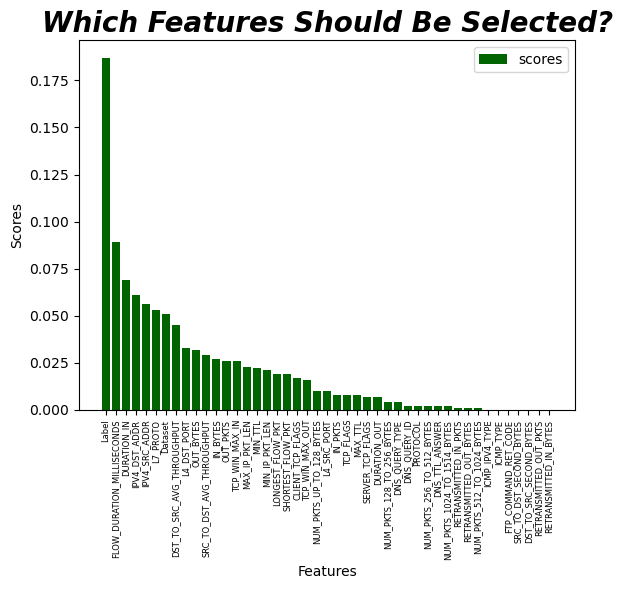

<Figure size 1100x400 with 0 Axes>

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

scores = np.round(rfc.feature_importances_, 3)
scores_table = pd.DataFrame({'features': train_X.columns, 'scores': scores})
scores_table = scores_table.sort_values(by='scores', ascending=False).set_index('features')

plt.bar(scores_table.index, scores_table['scores'], color="darkgreen", label="scores")
plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("Which Features Should Be Selected?", fontfamily="DejaVu Sans", fontsize=20,
          fontweight="bold", fontstyle="italic")
plt.xticks(rotation=90, fontsize=6)
plt.legend(loc='upper right')
plt.figure(figsize=(11, 4))
plt.show()

In [110]:
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select = 16)
rfe = rfe.fit(train_X, train_y)

feature_map = [(i,v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]
selected_features = [v for (i, v) in feature_map if i==True]

selected_features


['L4_DST_PORT',
 'L7_PROTO',
 'IN_BYTES',
 'OUT_BYTES',
 'FLOW_DURATION_MILLISECONDS',
 'DURATION_IN',
 'LONGEST_FLOW_PKT',
 'MAX_IP_PKT_LEN',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MAX_OUT',
 'Label',
 'IPV4_SRC_ADDR',
 'IPV4_DST_ADDR',
 'Dataset']

In [111]:
# Features that should be selected can be depicted as follows:
# - Label
# - DURATION_IN
# - IPV4_DST_ADDR
# - L7_PROTP
# - Dataset(division)
# - IPV4_SRC_ADDR
# - FLOW_DURATION_MILLISECONDS
# - DST_TO_SRC_AVG_THROUGHPUT
# - L4_DST_PORT
# - TCP_WIN_MAX_IN
# - OUT_BYTES
# - SRC_TO_DST_AVG_THROUGHPUT
# - OUT_PKTS
# - MAX_IP_PKT_LEN
# - LONGEST_FLOW_PKT
# - MIN_IP_PKT_LEN

network_finalized = network[['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 
                             'OUT_BYTES', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'LONGEST_FLOW_PKT',
                             'MAX_IP_PKT_LEN', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 
                             'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'Label', 'Attack_Class', 'Dataset']] 
dataset_group_1 = network_finalized.groupby('Dataset').get_group('NF-BoT-IoT-v2')
dataset_group_2 = network_finalized.groupby('Dataset').get_group('NF-CSE-CIC-IDS2018-v2')
dataset_group_3 = network_finalized.groupby('Dataset').get_group('NF-ToN-IoT-v2')
dataset_group_4 = network_finalized.groupby('Dataset').get_group('NF-UNSW-NB15-v2')
# At the same time, I need to extract the attack class for each dataset.
attack_group_1 = dataset_group_1['Attack_Class']
attack_group_2 = dataset_group_2['Attack_Class']
attack_group_3 = dataset_group_3['Attack_Class']
attack_group_4 = dataset_group_4['Attack_Class']

dataset_group_1 = dataset_group_1.drop(['Attack_Class', 'Dataset'], axis=1)
dataset_group_2 = dataset_group_2.drop(['Attack_Class', 'Dataset'], axis=1)
dataset_group_3 = dataset_group_3.drop(['Attack_Class', 'Dataset'], axis=1)
dataset_group_4 = dataset_group_4.drop(['Attack_Class', 'Dataset'], axis=1)


In [113]:
def convert_IPV4_to_num(row):
    partitions = row.split('.')
    l = [np.int64(x) for x in partitions]
    return l[0] * np.power(256, 3) + l[1] * np.power(256, 2) + l[2] * np.power(256, 1) + l[3] * np.power(256, 0) 

In [114]:
dataset_group_1['IPV4_SRC_ADDR'] = dataset_group_1['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)
dataset_group_2['IPV4_SRC_ADDR'] = dataset_group_2['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)
dataset_group_3['IPV4_SRC_ADDR'] = dataset_group_3['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)
dataset_group_4['IPV4_SRC_ADDR'] = dataset_group_4['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)

dataset_group_1['IPV4_DST_ADDR'] = dataset_group_1['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)
dataset_group_2['IPV4_DST_ADDR'] = dataset_group_2['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)
dataset_group_3['IPV4_DST_ADDR'] = dataset_group_3['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)
dataset_group_4['IPV4_DST_ADDR'] = dataset_group_4['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)

In [115]:
dataset_group_1

,IPV4_SRC_ADDR,IPV4_DST_ADDR,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,FLOW_DURATION_MILLISECONDS,DURATION_IN,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
0,3232261268,3232261127,80,7.0,420,0,4293092,1875,140,140,1120000,0,512,0,1
1,3232261268,3232261125,80,7.0,280,40,4294499,453,140,140,0,320000,512,0,1
8,3232261267,3232261125,80,7.0,280,40,4293420,1547,140,140,1120000,320000,512,0,1
13,3232261267,3232261125,80,7.0,420,0,4293327,1640,140,140,1120000,0,512,0,1
15,3232261269,3232261123,80,7.0,280,0,4293342,1625,140,140,1120000,0,512,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3232261270,3232261125,80,188.0,56,0,4294124,843,28,28,224000,0,0,0,1
9995,3232261270,3232261123,80,188.0,56,0,4293825,1142,28,28,224000,0,0,0,1
9996,3232261267,3232261125,80,7.0,280,0,4294029,938,140,140,1120000,0,512,0,1
9997,3232261267,3232261123,80,188.0,56,0,4294154,813,28,28,224000,0,0,0,1


In [116]:
dataset_group_2

,IPV4_SRC_ADDR,IPV4_DST_ADDR,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,FLOW_DURATION_MILLISECONDS,DURATION_IN,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
5,2887729717,1298005682,443,91.000,152,120,0,0,52,52,1216000,960000,8192,0,0
10,2948848415,2887729173,3389,0.000,1969,1773,0,0,1189,1189,15752000,14184000,64240,64000,0
11,3740661038,2887729261,23,77.000,40,0,0,0,40,40,320000,0,59190,0,0
12,2887729776,2887712770,53,0.000,70,116,0,0,116,116,560000,928000,0,0,0
14,2887730446,2887712770,53,5.126,71,87,0,0,87,87,1136000,1040000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,3400912638,2887729527,3389,0.000,1560,1873,0,0,1213,1213,12480000,14984000,8192,64000,0
9984,2887729251,877956217,443,91.178,3231,109424,0,0,1500,1500,25848000,875392000,8192,29200,0
9986,2887729426,2887712770,53,5.126,66,153,0,0,153,153,528000,1224000,0,0,0
9991,90515499,2887729447,3389,0.000,1476,1873,0,0,1213,1213,11808000,14984000,8192,64000,0


In [117]:
dataset_group_3

,IPV4_SRC_ADDR,IPV4_DST_ADDR,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,FLOW_DURATION_MILLISECONDS,DURATION_IN,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
2,3232235807,3232235855,1041,0.0,44,40,0,0,44,44,352000,320000,1024,0,0
3,3232235810,3232235855,9110,0.0,44,40,0,0,44,44,352000,320000,1024,0,0
4,3232235806,3232235928,1084,0.0,44,40,0,0,44,44,352000,320000,1024,0,0
6,3232235808,3232235945,9012,0.0,232,132,0,0,92,92,1856000,1056000,29200,65535,0
7,3232235807,3232235956,22,92.0,84,88,4294952,15,44,44,40000,40000,1024,29200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,3232235807,3232235960,80,7.0,542,387,0,0,274,274,4336000,3096000,29200,28960,1
9988,3232235807,3232235970,8201,0.0,48,40,4294928,0,48,48,384000,320000,4096,0,1
9989,3232235807,3232235970,80,7.0,224,120,4294951,16,60,60,104000,56000,29200,5792,1
9992,3232235806,3232235928,80,7.0,88,48,0,0,48,48,704000,384000,4096,29200,1


In [118]:
dataset_group_4

,IPV4_SRC_ADDR,IPV4_DST_ADDR,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,FLOW_DURATION_MILLISECONDS,DURATION_IN,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
61,1000734728,2511044099,6881,0.0,1540,1644,0,0,329,329,12320000,13152000,10136,10136,0
99,1000734724,2511044105,53,0.0,146,178,0,0,89,89,1168000,1424000,0,0,0
109,1000734729,2511044100,47777,0.0,536,304,0,0,152,152,4288000,2432000,0,0,0
131,2939006979,2511044108,179,0.0,25066,624,4294952,15,1500,1500,12528000,312000,16383,16383,1
185,1000734728,2511044100,53,0.0,146,178,0,0,89,89,1168000,1424000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,1000734720,2511044096,53,0.0,146,178,0,0,89,89,1168000,1424000,0,0,0
9903,1000734721,2511044105,6674,0.0,2230,13690,0,0,1352,1352,17840000,109520000,20272,14480,0
9943,1000734728,2511044096,15597,0.0,2542,23278,0,0,1352,1352,20336000,186224000,24616,14480,0
9959,1000734727,2511044098,21,1.0,1493,2056,0,0,106,106,9544000,10784000,17376,15928,0


In [119]:
from sklearn.model_selection import train_test_split
train_X_group1, test_X_group1, train_y_group1, test_y_group1 = train_test_split(dataset_group_1, attack_group_1, train_size = 0.8,
                                                                                test_size = 0.2, random_state = 2)
train_X_group2, test_X_group2, train_y_group2, test_y_group2 = train_test_split(dataset_group_2, attack_group_2, train_size = 0.8,
                                                                                test_size = 0.2, random_state = 2)
train_X_group3, test_X_group3, train_y_group3, test_y_group3 = train_test_split(dataset_group_3, attack_group_3, train_size=0.8,
                                                                                test_size = 0.2, random_state = 2)
train_X_group4, test_X_group4, train_y_group4, test_y_group4 = train_test_split(dataset_group_4, attack_group_4, train_size = 0.8,
                                                                                test_size = 0.2, random_state = 2)


In [145]:
train_X_group1

,IPV4_SRC_ADDR,IPV4_DST_ADDR,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,FLOW_DURATION_MILLISECONDS,DURATION_IN,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
2980,3232261267,3232261127,80,7.0,280,0,4293967,1000,140,140,1120000,0,512,0,1
3883,3232261269,3232261125,212,0.0,44,40,0,0,44,44,352000,320000,1024,0,1
3307,3232261267,3232261126,80,188.0,56,0,4294186,781,28,28,224000,0,0,0,1
2182,3232261267,3232261125,80,188.0,56,0,4293629,1338,28,28,224000,0,0,0,1
969,3232261268,3232261123,80,188.0,56,0,4294449,518,28,28,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,3232261268,3232261127,80,188.0,84,0,4293756,1211,28,28,224000,0,0,0,1
2256,3232261269,3232261125,80,188.0,56,0,4293904,1063,28,28,224000,0,0,0,1
5159,3232261268,3232261126,19101,0.0,44,40,0,0,44,44,352000,320000,1024,0,1
7349,3232261267,3232261123,80,188.0,84,0,4293497,1470,28,28,224000,0,0,0,1


In [129]:
test_X_group1

,IPV4_SRC_ADDR,IPV4_DST_ADDR,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,FLOW_DURATION_MILLISECONDS,DURATION_IN,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
3476,3232261268,3232261123,80,7.0,280,0,4293951,1016,140,140,1120000,0,512,0,1
6878,3232261270,3232261125,80,7.0,280,0,4294123,844,140,140,1120000,0,512,0,1
4451,3232261269,3232261123,46282,0.0,44,40,0,0,44,44,352000,320000,1024,0,1
5548,3232261270,3232261126,80,188.0,56,0,4293685,1282,28,28,224000,0,0,0,1
3775,3232261269,3232261123,80,188.0,140,0,4293749,1218,28,28,224000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,3232261270,3232261123,80,188.0,28,0,0,0,28,28,224000,0,0,0,1
1974,3232261268,3232261125,80,188.0,56,0,4294529,438,28,28,0,0,0,0,1
9507,3232261268,3232261123,80,188.0,56,0,4294540,427,28,28,224000,0,0,0,1
6085,3232261270,3232261126,80,7.0,280,0,4293163,1804,140,140,1120000,0,512,0,1


In [170]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

DT1 = DecisionTreeClassifier()
DT1.fit(train_X_group1, train_y_group1)
NB1 = BernoulliNB()
NB1.fit(train_X_group1, train_y_group1)
KNN1 = KNeighborsClassifier()
KNN1.fit(train_X_group1, train_y_group1)
SVM1 = SVC()
SVM1.fit(train_X_group1, train_y_group1)

DT2 = DecisionTreeClassifier()
DT2.fit(train_X_group2, train_y_group2)
NB2 = BernoulliNB()
NB2.fit(train_X_group2, train_y_group2)
KNN2 = KNeighborsClassifier()
KNN2.fit(train_X_group2, train_y_group2)
SVM2 = SVC()
SVM2.fit(train_X_group2, train_y_group2)

DT3 = DecisionTreeClassifier()
DT3.fit(train_X_group3, train_y_group3)
NB3 = BernoulliNB()
NB3.fit(train_X_group3, train_y_group3)
KNN3 = KNeighborsClassifier()
KNN3.fit(train_X_group3, train_y_group3)
SVM3 = SVC()
SVM3.fit(train_X_group3, train_y_group3)

DT4 = DecisionTreeClassifier()
DT4.fit(train_X_group4, train_y_group4)
NB4 = BernoulliNB()
NB4.fit(train_X_group4, train_y_group4)
KNN4 = KNeighborsClassifier()
KNN4.fit(train_X_group4, train_y_group4)
SVM4 = SVC()
SVM4.fit(train_X_group4, train_y_group4)

SVC()

In [167]:
network['Dataset'].value_counts()

NF-BoT-IoT-v2            4934
NF-CSE-CIC-IDS2018-v2    2563
NF-ToN-IoT-v2            2203
NF-UNSW-NB15-v2           300
Name: Dataset, dtype: int64


====================================NF-BoT-IoT-v2 Decision Tree Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9858137891152092

The accuracy of the model is: 
 1.0

The visualization of the confusion matrix can be displayed as below:



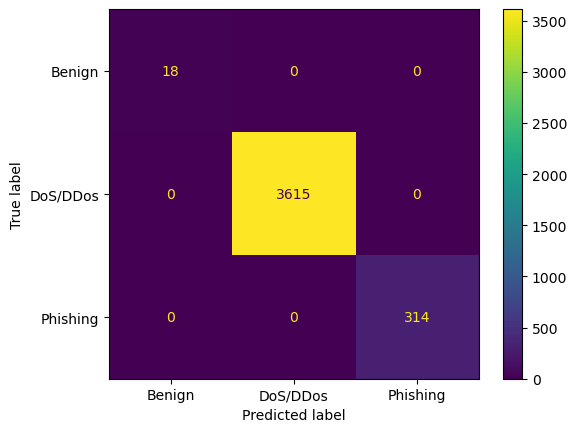


The heatmap for the classification table can be demonstrated as follows:


====================================NF-BoT-IoT-v2 Naive Bayes Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.947815973783975

The accuracy of the model is: 
 0.9478084621231315

The visualization of the confusion matrix can be displayed as below:



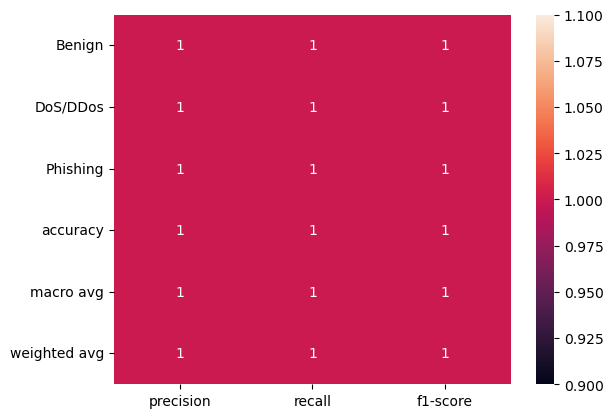

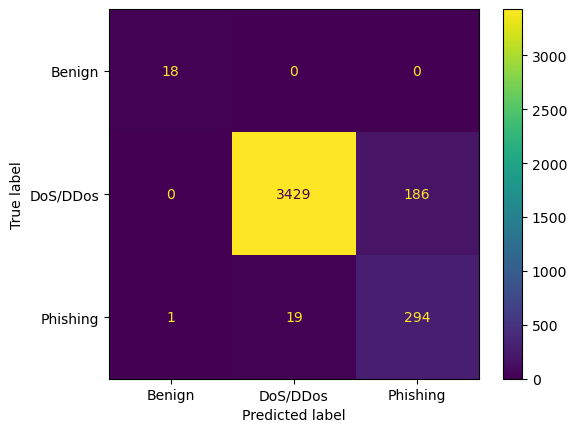


The heatmap for the classification table can be demonstrated as follows:


====================================NF-BoT-IoT-v2 K-Nearest Neighbor Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9842922315748892

The accuracy of the model is: 
 0.9880922219407144

The visualization of the confusion matrix can be displayed as below:



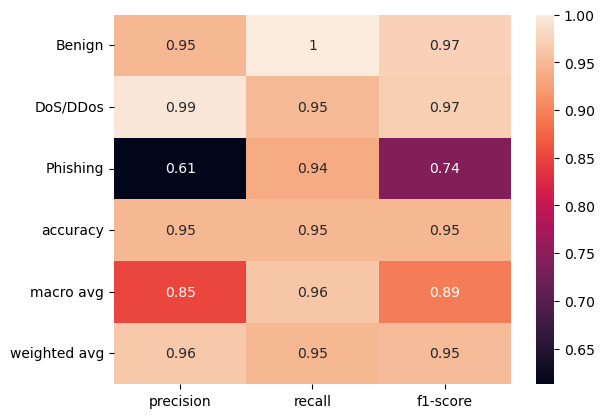

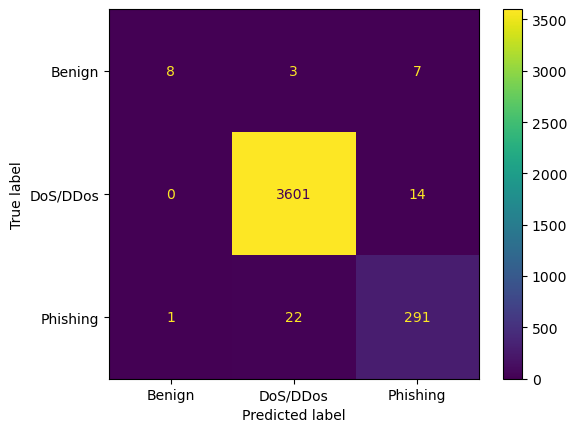


The heatmap for the classification table can be demonstrated as follows:


====================================NF-BoT-IoT-v2 SVM Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9158857546745486

The accuracy of the model is: 
 0.9158854826450469

The visualization of the confusion matrix can be displayed as below:



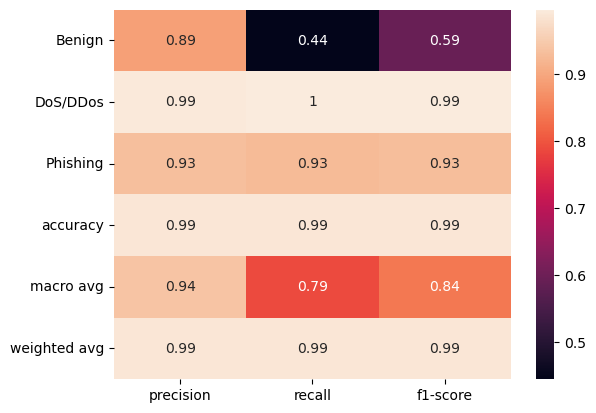

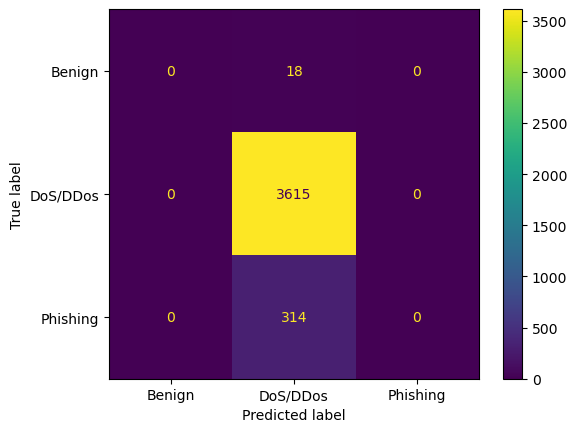


The heatmap for the classification table can be demonstrated as follows:



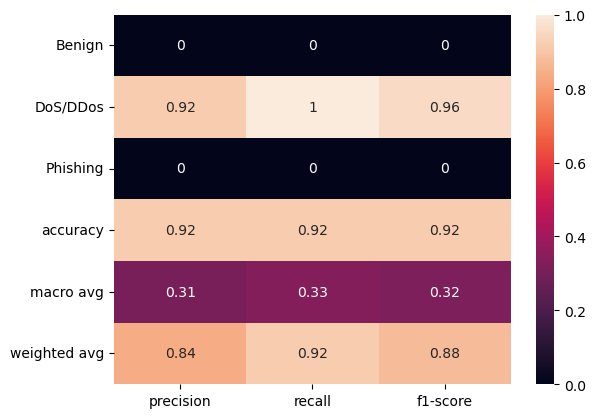

In [196]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

models1 = []
models1.append(("Decision Tree Classifier: ", DT1))
models1.append(("Naive Bayes Classifier: ", NB1))
models1.append(("K-Nearest Neighbor Classifier: ", KNN1))
models1.append(("SVM Classifier: ", SVM1))


group1_train_val_score = []
for i, v in models1:
    scores_group1_train = cross_val_score(v, train_X_group1, train_y_group1, cv=10)
    group1_train_val_score.append(scores_group1_train)
    accuracy_group1_train = accuracy_score(train_y_group1, v.predict(train_X_group1))
    confusion_matrix_group1_train = confusion_matrix(train_y_group1, v.predict(train_X_group1))
    classification_group1_train = classification_report(train_y_group1, v.predict(train_X_group1), output_dict=True)
    print()
    print("===================================={} {}: Model Evaluation ====================================".format("NF-BoT-IoT-v2", i))
    print()
    print("The mean score in 10-Fold cross validation is: \n", scores_group1_train.mean())
    print()
    print("The accuracy of the model is: \n", accuracy_group1_train)
    print()
    print("The visualization of the confusion matrix can be displayed as below:\n")
    cm_display_group1_train = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group1_train, display_labels=['Benign', 'DoS/DDos', 'Phishing'])
    cm_display_group1_train.plot()
    plt.show()
    print()
    print("The heatmap for the classification table can be demonstrated as follows:")
    sns.heatmap(pd.DataFrame(classification_group1_train).iloc[:-1,:].T, annot=True)
    print()
    

In [194]:
network_finalized['Dataset'].value_counts()

NF-BoT-IoT-v2            4934
NF-CSE-CIC-IDS2018-v2    2563
NF-ToN-IoT-v2            2203
NF-UNSW-NB15-v2           300
Name: Dataset, dtype: int64

In [195]:
network_finalized[network_finalized['Dataset'] == 'NF-BoT-IoT-v2']['Attack_Class'].value_counts()

DoS/DDos    4533
Phishing     379
Benign        22
Name: Attack_Class, dtype: int64


====================================NF-BoT-IoT-v2 Decision Tree Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9888373531230673

The accuracy of the model is: 
 0.9878419452887538

The visualization of the confusion matrix can be displayed as below:



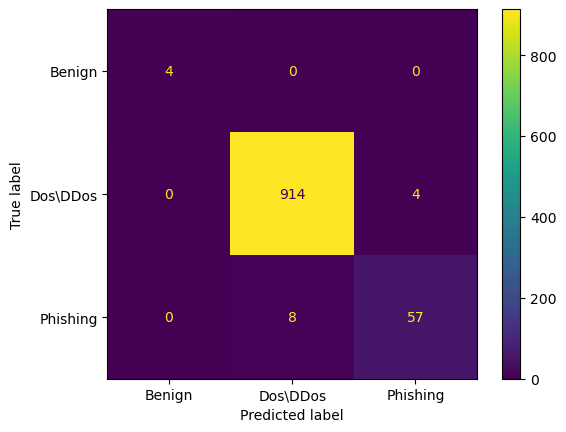


The heatmap for the classification report can be demonstrated as below:



====================================NF-BoT-IoT-v2 Naive Bayes Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.941259534116677

The accuracy of the model is: 
 0.9432624113475178

The visualization of the confusion matrix can be displayed as below:



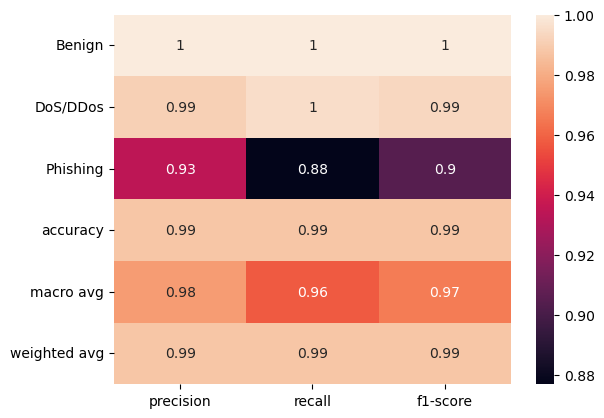

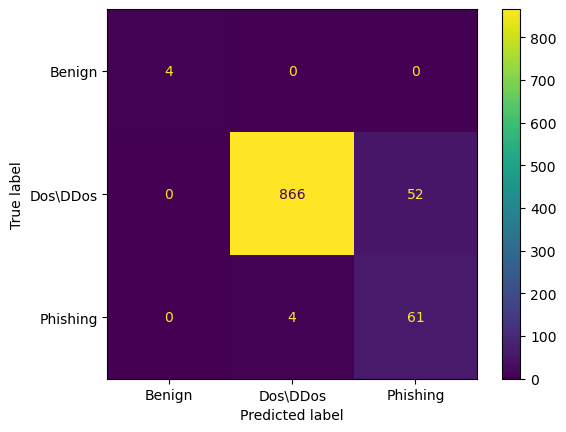


The heatmap for the classification report can be demonstrated as below:



====================================NF-BoT-IoT-v2 K-Nearest Neighbor Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9848278705421564

The accuracy of the model is: 
 0.9898682877406282

The visualization of the confusion matrix can be displayed as below:



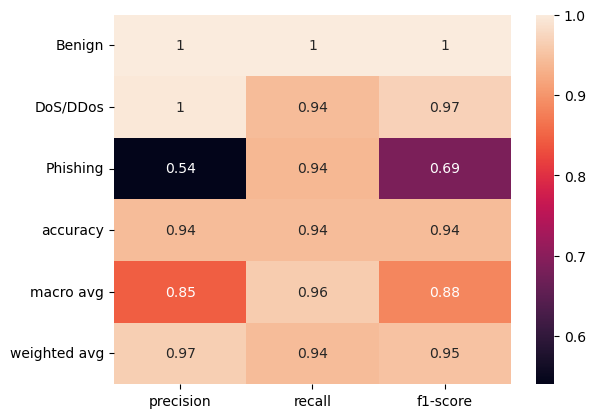

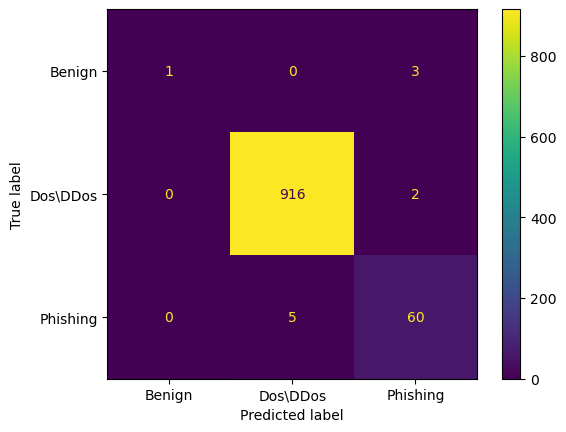


The heatmap for the classification report can be demonstrated as below:



====================================NF-BoT-IoT-v2 SVM Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9300968872397444

The accuracy of the model is: 
 0.9300911854103343

The visualization of the confusion matrix can be displayed as below:



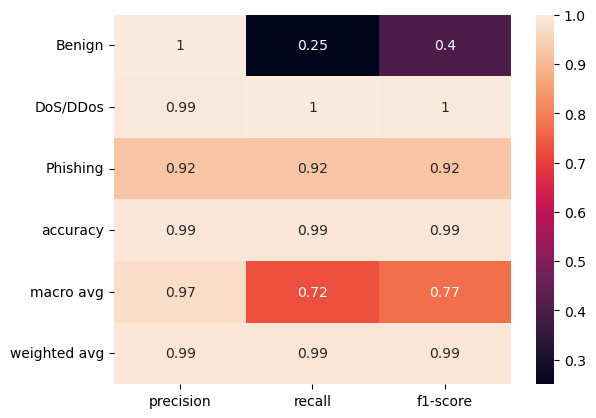

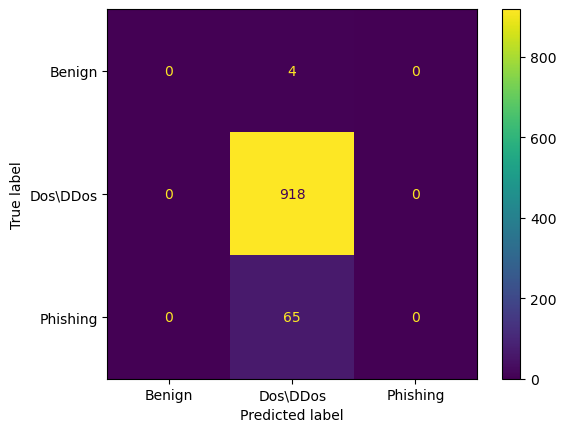


The heatmap for the classification report can be demonstrated as below:




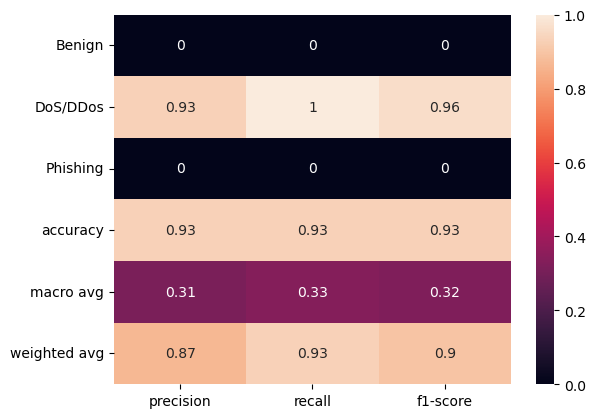

In [197]:
group1_test_val_score = []
for i, v in models1:
   scores_group1_test = cross_val_score(v, test_X_group1, test_y_group1, cv=10)
   group1_test_val_score.append(scores_group1_test)
   accuracy_group1_test = accuracy_score(test_y_group1, v.predict(test_X_group1))
   confusion_matrix_group1_test = confusion_matrix(test_y_group1, v.predict(test_X_group1))
   classification_group1_test = classification_report(test_y_group1, v.predict(test_X_group1), output_dict=True)
   print()
   print("===================================={} {}: Model Evaluation ====================================".format("NF-BoT-IoT-v2", i))
   print()
   print("The mean score in 10-Fold cross validation is: \n", scores_group1_test.mean())
   print()
   print("The accuracy of the model is: \n", accuracy_group1_test)
   print()
   print("The visualization of the confusion matrix can be displayed as below:\n")
   cm_display_group1_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group1_test, display_labels=['Benign', 'Dos\DDos', 'Phishing'])
   cm_display_group1_test.plot()
   plt.show()
   print()
   print("The heatmap for the classification report can be demonstrated as below:\n")
   sns.heatmap(pd.DataFrame(classification_group1_test).iloc[:-1,:].T, annot=True)   
   print()

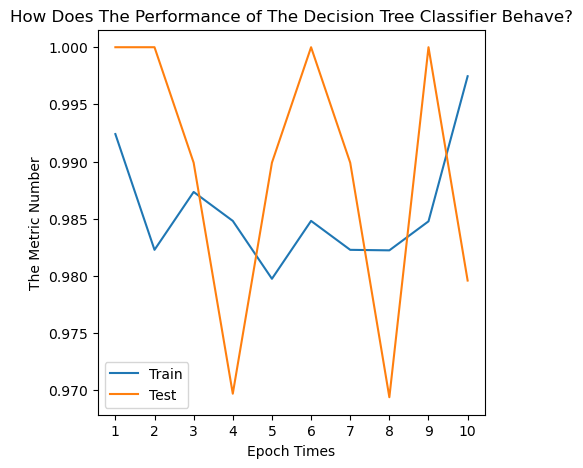

In [209]:
epoches_1_group1 = np.arange(1, 11, 1)
plt.figure(figsize=(5, 5))
plt.plot(epoches_1_group1, group1_train_val_score[0], label="Train")
plt.plot(epoches_1_group1, group1_test_val_score[0], label="Test")
plt.title("How Does The Performance of The Decision Tree Classifier Behave?")
plt.xlabel("Epoch Times")
plt.ylabel("The Metric Number")
plt.xticks(epoches_1_group1)
plt.legend()
plt.show()

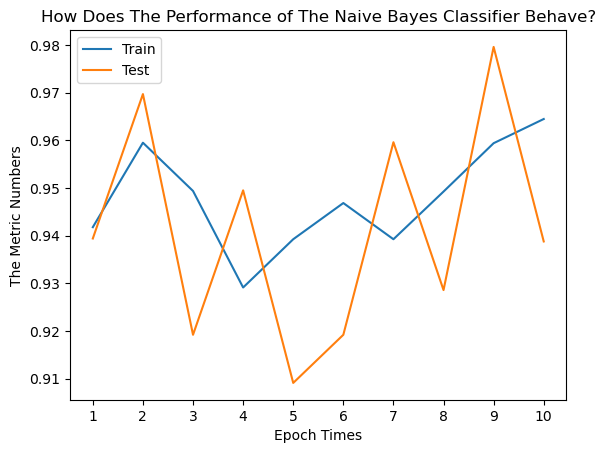

In [210]:
epoches_2_group1 = np.arange(1, 11, 1)
plt.plot(epoches_2_group1, group1_train_val_score[1], label="Train")
plt.plot(epoches_2_group1_, group1_test_val_score[1], label="Test")
plt.title("How Does The Performance of The Naive Bayes Classifier Behave?")
plt.xlabel("Epoch Times")
plt.ylabel("The Metric Numbers")
plt.xticks(epoches_2_group1)
plt.legend()
plt.show()


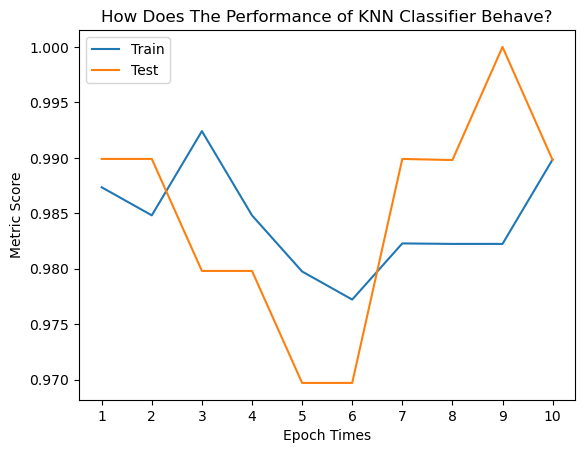

In [212]:
epoches_3_group1 = np.arange(1, 11, 1)
plt.plot(epoches_3_group1, group1_train_val_score[2], label="Train")
plt.plot(epoches_3_group1, group1_test_val_score[2], label="Test")
plt.title("How Does The Performance of KNN Classifier Behave?")
plt.xlabel("Epoch Times")
plt.ylabel("Metric Score")
plt.xticks(epoches_3_group1)
plt.legend()
plt.show()

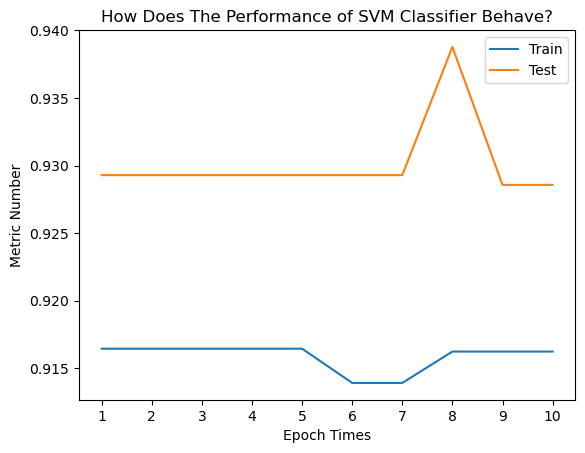

In [214]:
epoches_4_group1 = np.arange(1, 11, 1)
plt.plot(epoches_4_group1, group1_train_val_score[3], label="Train")
plt.plot(epoches_4_group1, group1_test_val_score[3], label="Test")
plt.title("How Does The Performance of SVM Classifier Behave?")
plt.xlabel("Epoch Times")
plt.ylabel("Metric Number")
plt.xticks(epoches_4_group1)
plt.legend()
plt.show()